In [21]:
import numpy as np
import matplotlib.pyplot as plt
from BinSpectra import binspec

# Sample spectrum with a drop at the start

## Resolution reduced by fartor 3.0

No. of new bins should be: 3 ;  No. of new bins are: (3,)


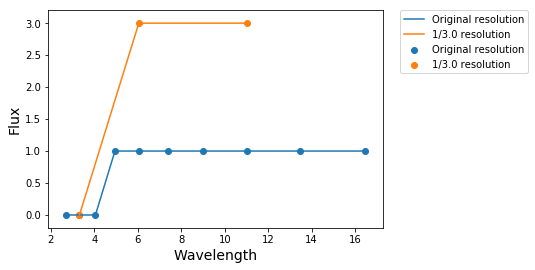

In [22]:
wvl_start = np.exp(np.arange(1., 3., 0.2))
f_start = np.ones(len(wvl_start))
f_start[0:3] = 0
ns_start = binspec(wvl_start, f_start, f_start, 3.0)
print("No. of new bins should be:", int(float(len(wvl_start)) / 3.0),  ";  No. of new bins are:", ns_start[0].shape)
plt.plot(wvl_start, f_start, label="Original resolution")
plt.scatter(wvl_start, f_start, label="Original resolution")
plt.plot(ns_start[0], ns_start[1], label="1/3.0 resolution")
plt.scatter(ns_start[0], ns_start[1], label="1/3.0 resolution")
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Sample spectrum with a drop in the middle

## Resolution reduced by fartor 5.0

No. of new bins should be: 2 ;  No. of new bins are: (2,)


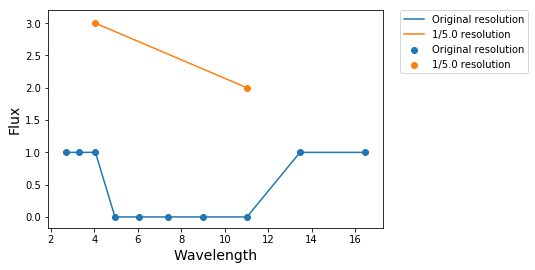

In [23]:
wvl_mid = np.exp(np.arange(1., 3., 0.2))
f_mid = np.ones(len(wvl_mid))
f_mid[3:8] = 0
ns_mid = binspec(wvl_mid, f_mid, f_mid, 5.0)
print("No. of new bins should be:", int(float(len(wvl_mid)) / 5.0),  ";  No. of new bins are:", ns_mid[0].shape)
plt.plot(wvl_mid, f_mid, label="Original resolution")
plt.scatter(wvl_mid, f_mid, label="Original resolution")
plt.plot(ns_mid[0], ns_mid[1], label="1/5.0 resolution")
plt.scatter(ns_mid[0], ns_mid[1], label="1/5.0 resolution")
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Sample spectrum with a drop at the end

## Resolution reduced by fartor 3.0

No. of new bins should be: 3 ;  No. of new bins are: (3,)


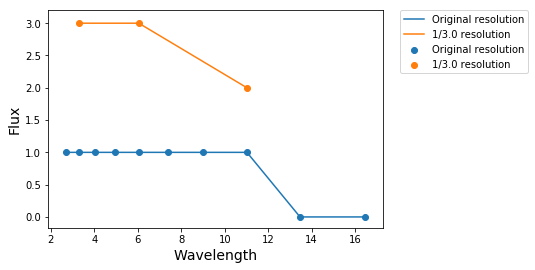

In [24]:
wvl_end = np.exp(np.arange(1., 3., 0.2))
f_end = np.ones(len(wvl_end))
f_end[-2:-1] = 0
f_end[-1] = 0
ns_end = binspec(wvl_end, f_end, f_end, 3.0)
print("No. of new bins should be:", int(float(len(wvl_end)) / 3.0),  ";  No. of new bins are:", ns_end[0].shape)
plt.plot(wvl_end, f_end, label="Original resolution")
plt.scatter(wvl_end, f_end, label="Original resolution")
plt.plot(ns_end[0], ns_end[1], label="1/3.0 resolution")
plt.scatter(ns_end[0], ns_end[1], label="1/3.0 resolution")
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)